# Appendix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.gam.api import GLMGam
import numpy as np
import statsmodels.api as sm
from pygam import LinearGAM, s, te, f
from itertools import product

# Section 1: Data cleaning and Exploratory Data Analysis

Reading data and dropping unused column

In [2]:
df = pd.read_excel("Real estate valuation data set.xlsx")
df = df.drop(columns= ["No"])

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Getting dimensions of data, and checking for missing values

In [4]:
df.shape

(414, 7)

In [11]:
df.isna().sum()

transaction_date      0
house_age             0
dist_to_MRT           0
num_of_conv_stores    0
latitude              0
longitude             0
price                 0
dtype: int64

Changing column names to more suitable variable names

In [5]:
df.columns = ["transaction_date", "house_age", "dist_to_MRT", "num_of_conv_stores", 
                 "latitude", "longitude", "price"]
df.head()

,transaction_date,house_age,dist_to_MRT,num_of_conv_stores,latitude,longitude,price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Getting description of variables in the data

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transaction_date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
house_age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
dist_to_MRT,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
num_of_conv_stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
price,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


### Baseline Table

| Variable| Median (IQR)|
| :-- | :-- |
| Transaction date (year and month) | 2013.167 (2012.667, 2013.417) | 
| Age of house (year) | 16.10 (9.03, 28.15) |
| Distance to MRT (meter) | 492.23 (289.32, 1454.28) |
| Number of convenience stores | 4 (1, 6) |
| Latitude (degree) | 24.97 (24.96, 24.98) |
| Longitude (degree) | 121.54 (121.53, 121.54) |
| Housing price per unit area (10,000 New Taiwan Dollar per Ping) | 38.45 (27.70, 46.60) |


Plotting histogram of housing price

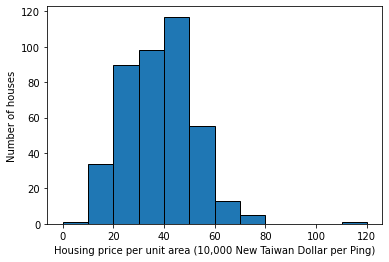

In [7]:
plt.hist(df['price'], edgecolor='black', bins = np.arange(0,130, 10).tolist())
plt.xlabel('Housing price per unit area (10,000 New Taiwan Dollar per Ping)')
plt.ylabel('Number of houses')
#plt.xticks(np.arange(0,130, 10).tolist())
plt.savefig('price dist.png')

Getting correlation between variables in the data

In [8]:
df.corr()

,transaction_date,house_age,dist_to_MRT,num_of_conv_stores,latitude,longitude,price
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
dist_to_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
num_of_conv_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Plotting scatter plots of housing variables against housing price

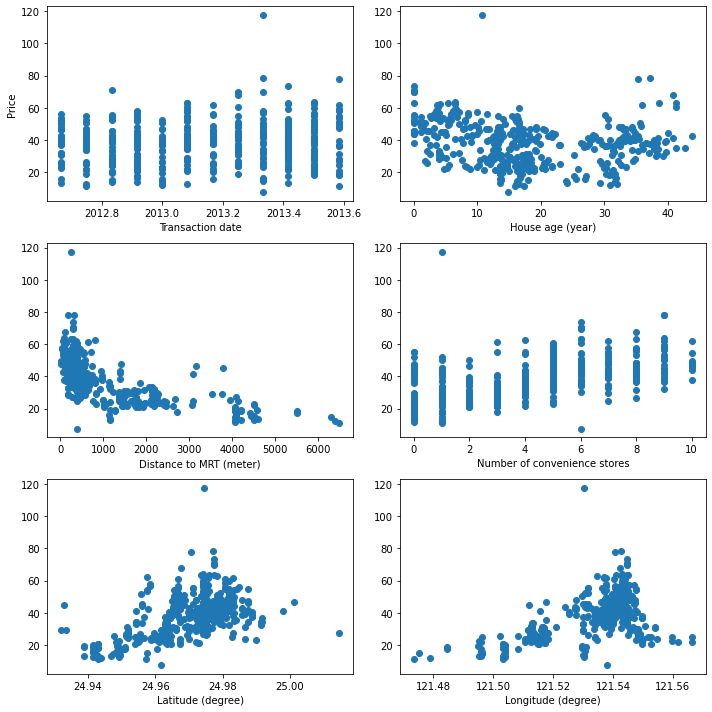

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(df['transaction_date'], df['price'])
axs[0, 0].set_xlabel('Transaction date')
axs[0, 0].set_ylabel('Price')
axs[0, 1].scatter(df['house_age'], df['price'])
axs[0, 1].set_xlabel('House age (year)')
axs[1, 0].scatter(df['dist_to_MRT'], df['price'])
axs[1, 0].set_xlabel('Distance to MRT (meter)')
axs[1, 1].scatter(df['num_of_conv_stores'], df['price'])
axs[1, 1].set_xlabel('Number of convenience stores')
axs[2, 0].scatter(df['latitude'], df['price'])
axs[2, 0].set_xlabel('Latitude (degree)')
axs[2, 1].scatter(df['longitude'], df['price'])
axs[2, 1].set_xlabel('Longitude (degree)')
fig.tight_layout()


# Section 2.1: Fitting generalized additive model with smoothing spline

Fit generalized additive model by using `LinerGam()` function found in `pygam` library. A formula `s(0)+s(1)+s(2)+s(3)+te(4,5)` can be passed in to add `s()` spline term for variables and `te()` interaction term between two variables (in our case latitude and longitude). Number inside the `s()` and `te()` term are the index of which variables we want to assign that spline or interaction term, based on given data `X`.

Note that data used to fit the model through `LinearGAM()` function has to be a numpy array. Further, `gridsearch()` is used to fit the model by finding the best values for the penalty terms that control for model complexity, $\lambda$. To use that, simply pass in `X`, the data consisting of data containing the housing variables, then the array of house prices for the data, and lastly a list of values for possible $\lambda$. 

The model will then run cross validation to choose the best penalty terms for the model.

In [ ]:
from pygam import LinearGAM, s, te, f

In [9]:
X = df[['transaction_date', 'house_age', 'dist_to_MRT', 'num_of_conv_stores',
       'latitude', 'longitude']].copy().to_numpy()
type(X)

numpy.ndarray

In [10]:
X = df[['transaction_date', 'house_age', 'dist_to_MRT', 'num_of_conv_stores',
       'latitude', 'longitude']].copy().to_numpy()
lams = np.asarray([10, 20, 30, 40, 50])
lams_grid = np.asarray(list(product(lams, repeat=6)))
lams_grid.shape
gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+te(4,5)).gridsearch(X, df['price'], lam = lams_grid)
gam.summary()

100% (15625 of 15625) |##################| Elapsed Time: 0:16:29 Time:  0:16:29


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     22.8501
Link Function:                     IdentityLink Log Likelihood:                                 -2058.9649
Number of Samples:                          414 AIC:                                               4165.63
                                                AICc:                                             4168.676
                                                GCV:                                               63.4472
                                                Scale:                                             57.1766
                                                Pseudo R-Squared:                                   0.7075
Feature Function                  Lam

<ipython-input-10-55d70d841b23>:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Now that we have our model specifications, use the `gam.fit()` function to fit this model to the data that we have.

In [11]:
gam_fit = gam.fit(X, df['price'])

Plotting the spline curves for transaction date, age of house, distance to nearest MRT and number of convenience stores

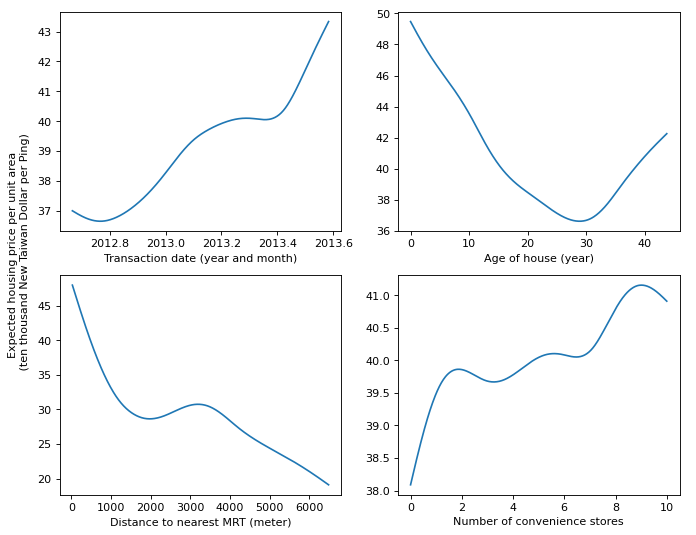

In [12]:
vrbls = ['transaction_date', 'house_age', 'dist_to_MRT', 'num_of_conv_stores']
x_labels = ['Transaction date (year and month)', 'Age of house (year)', 'Distance to nearest MRT (meter)', 
          'Number of convenience stores']
num = 500

fig=plt.figure(figsize=(10, 8), dpi=80)

def get_median_mode(vrbls, num): 
    d_mat = {}
    for var in vrbls:
        if np.issubdtype(df[var].dtype, np.number):
            d_mat[var] = [df[var].median()]
        else:
            d_mat[var] = [df[var].mode()] 
    d_mat = pd.DataFrame(d_mat)
    return(sm.add_constant(pd.concat([d_mat]*num)))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel("Expected housing price per unit area \n (ten thousand New Taiwan Dollar per Ping)")

for itr, var in enumerate(vrbls):
    ax=fig.add_subplot(2, 2, itr+1)
    d_mat = {}
    d_mat = get_median_mode(df, num)
    d_mat[var] = np.linspace(df[var].min(), df[var].max(), num) 
    d_mat_X = d_mat[['transaction_date', 'house_age', 'dist_to_MRT', 'num_of_conv_stores',
       'latitude', 'longitude']].copy().to_numpy()
    y_pred = gam_fit.predict(d_mat_X)
    plt.plot(d_mat[var], y_pred)
    plt.xlabel(x_labels[itr])

Plotting 3D partial dependence of latitude and longitude towards housing price

Text(0.5, 0, 'Partial dependence towards housing price per unit area')

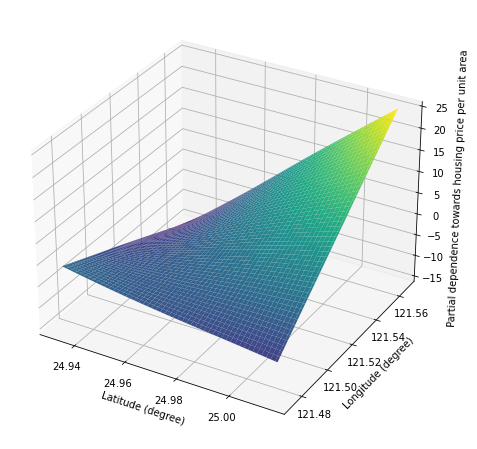

In [20]:
from mpl_toolkits import mplot3d 
plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
XX = gam.generate_X_grid(term=4, meshgrid=True)
Z = gam.partial_dependence(term=4, X=XX, meshgrid=True)
#Z = gam.predict(X=XX)
ax = plt.axes(projection='3d') 
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')
ax.set_xlabel('Latitude (degree)')
ax.set_ylabel('Longitude (degree)')
ax.set_zlabel('Partial dependence towards housing price per unit area')

# Section 2.2: Predicting housing price for new values of variables

In order to make new predictions for housing price per unit area, values for the different variables regarding a particular house can be inputted to the fitted spline model, `gam`, to predict for its housing price based on the model.

The following variable names are used to represent the different variables:\
`transaction_date`: Transaction date (year and month)\
`house_age`: Age of house (year)\
`dist_to_MRT`: Distance to nearest MRT (meter)\
`num_of_conv_stores`: Number of convenience stores in the living circle on foot\
`latitude`: Latitude (degree)
`longitude`: Longitude (degree)

To get a predicted value for a housing price, we can use `gam.predict()` function, and pass in values for the housing variables into the function.

An example can be found below, for a house with the following information:
- Transaction date: 2013.167
- Age of house: 16.10
- Distance to nearest MRT: 492.23
- Num of convenience stores: 4
- Latitude: 24.97
- Longitude: 121.54

In [139]:
new_values = pd.DataFrame({'transaction_date': [2013.167], 
                       'house_age': [16.10],
                       'dist_to_MRT': [492.23],
                       'num_of_conv_stores':[4],
                       'latitude':[24.97],
                       'longitude':[121.54]}).to_numpy()
predicted_price = gam.predict(new_values)[0]
predicted_price

39.451487437397375

# Section 3: (Sentiment Analysis) Fitting regression spline, variable selection by Forward Selection Method using AIC

Another plausible option was to fit a regression spline (used as sentiment analysis in this paper), as follows:

In [12]:
fml = 'price ~ transaction_date + house_age + dist_to_MRT + num_of_conv_stores + latitude + longitude'
results = sm.GLM.from_formula(
fml, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                  414
Model:                            GLM   Df Residuals:                      407
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          78.456
Method:                          IRLS   Log-Likelihood:                -1487.0
Date:                Mon, 24 Oct 2022   Deviance:                       31931.
Time:                        18:38:56   Pearson chi2:                 3.19e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7462
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.444e+04   6775.386     -2.132      0.033   -2.77e+04   -1162.470
transaction_date       5.1490      1.557      3.307      0.001       2.098       8.200
house_age             -0.2697      0.039     -7.000      0.000      -0.345      -0.194
dist_to_MRT           -0.0045      0.001     -6.250      0.000      -0.006      -0.003
num_of_conv_stores     1.1333      0.188      6.023      0.000       0.765       1.502
latitude             225.4701     44.566      5.059      0.000     138.123     312.817
longitude            -12.4291     48.581     -0.256      0.798    -107.646      82.788
======================================================================================
"""

To select for best variable and complexity, conduct forward selection method with AIC:

In [7]:
def fstep_aic(dat, outcome, fixed):
    '''
    Forward stepwise spline fitting with AIC input:
    dat = pandas data frame
    outcome = dependent variable name
    fixed = list of tuples to keep fixed with (var_name, df)
    output: list of models with AIC '''
    model_data = []
    fmla = f'{outcome}~'
    vrbls = dat.columns.to_list() 
    vrbls.remove(outcome) 
    fixed_var = []
    fixed_df = []
    for var in fixed:
        if var[0] in vrbls:
            vrbls.remove(var[0])
            fmla = fmla + f'{var[0]}+' 
        if var[1]>1:
            fixed_var.append(var[0])
            fixed_df.append(var[1]) 
    for var in vrbls:
        c_fmla = fmla + var
        if np.issubdtype(dat.dtypes[var], np.number):
            deg_free = [1,4,5,6,7] 
        else:
            deg_free = [1] 
        for free in deg_free:
            if any([x>1 for x in [free]+fixed_df]): 
                if free>1:
                    c_vars = [var]+fixed_var
                    dfs = [free]+fixed_df 
                else:
                    c_vars = fixed_var
                    dfs = fixed_df
                smoothing = sm.gam.BSplines(
                    dat[c_vars], df=dfs,
                    degree=(len(dfs))*[3]) 
                model = GLMGam.from_formula(
                    c_fmla, data=dat, smoother=smoothing)
            else:
                model = sm.GLM.from_formula(
                        c_fmla, data=dat) 
            results = model.fit()
            c_model = {'Spline': var, 'DF': free, 'AIC': round(results.aic, 2)}
            model_data.append(c_model)
        model_aic = pd.DataFrame.from_records(model_data)
    return(model_aic.sort_values(by='AIC'))

In [22]:
fstep_aic(df, 'price', [])

,Spline,DF,AIC
14,dist_to_MRT,7,2999.23
13,dist_to_MRT,6,3006.24
11,dist_to_MRT,4,3007.06
12,dist_to_MRT,5,3008.46
29,longitude,7,3072.29
28,longitude,6,3084.60
10,dist_to_MRT,1,3089.07
26,longitude,4,3124.12
27,longitude,5,3126.11
22,latitude,5,3139.19


In [23]:
fstep_aic(df, 'price', fixed=[('dist_to_MRT',5)])

,Spline,DF,AIC
7,house_age,5,2953.48
6,house_age,4,2953.54
19,latitude,7,2954.87
8,house_age,6,2954.99
17,latitude,5,2956.37
18,latitude,6,2956.88
9,house_age,7,2957.20
16,latitude,4,2957.82
15,latitude,1,2962.03
5,house_age,1,2971.71


In [28]:
fstep_aic(df, 'price', fixed=[('dist_to_MRT',5),('house_age',4)])

,Spline,DF,AIC
14,latitude,7,2884.39
12,latitude,5,2885.93
11,latitude,4,2886.28
13,latitude,6,2886.75
10,latitude,1,2894.36
0,transaction_date,1,2930.26
1,transaction_date,4,2932.29
2,transaction_date,5,2933.51
3,transaction_date,6,2935.54
4,transaction_date,7,2937.01


In [29]:
fstep_aic(df, 'price', fixed=[('dist_to_MRT',5),('house_age',4), ('latitude',5)])

,Spline,DF,AIC
0,transaction_date,1,2862.30
2,transaction_date,5,2865.43
1,transaction_date,4,2865.49
3,transaction_date,6,2867.48
4,transaction_date,7,2868.79
5,num_of_conv_stores,1,2882.03
14,longitude,7,2882.86
11,longitude,4,2883.36
13,longitude,6,2884.17
12,longitude,5,2885.08


In [30]:
fstep_aic(df, 'price', fixed=[('dist_to_MRT',5),('house_age',4), ('latitude',5),
                             ('transaction_date',1)])

,Spline,DF,AIC
0,num_of_conv_stores,1,2860.20
9,longitude,7,2861.20
5,longitude,1,2861.26
6,longitude,4,2861.39
8,longitude,6,2862.34
7,longitude,5,2862.95
1,num_of_conv_stores,4,2863.17
2,num_of_conv_stores,5,2864.91
3,num_of_conv_stores,6,2865.43
4,num_of_conv_stores,7,2866.70


In [31]:
fstep_aic(df, 'price', fixed=[('dist_to_MRT',5),('house_age',4), ('latitude',5),
                             ('transaction_date',1), ('num_of_conv_stores',1)])

,Spline,DF,AIC
0,longitude,1,2859.49
1,longitude,4,2860.82
4,longitude,7,2861.72
2,longitude,5,2862.33
3,longitude,6,2863.54


Hence the spline model has an AIC of 2859.49

Fitting intercept model:

In [35]:
incpt_model = sm.GLM.from_formula('price ~ 1', data=df).fit()
print(f"Intercept Model, AIC: {np.round(incpt_model.aic,2)}")

Intercept Model, AIC: 3337.41


Fitting GLM linear model:

In [39]:
fml = 'price ~ transaction_date + house_age + dist_to_MRT + num_of_conv_stores + latitude + longitude'
glm_model = sm.GLM.from_formula(fml, data=df).fit()
print(f"GLM Linear Model, AIC: {np.round(glm_model.aic,2)}")


GLM Linear Model, AIC: 2987.91


Therefore, the spline model has a better fit compared to the intercept model or the GLM linear model.

Plotting spline curves for each variables based on best model decided by forward selection method:

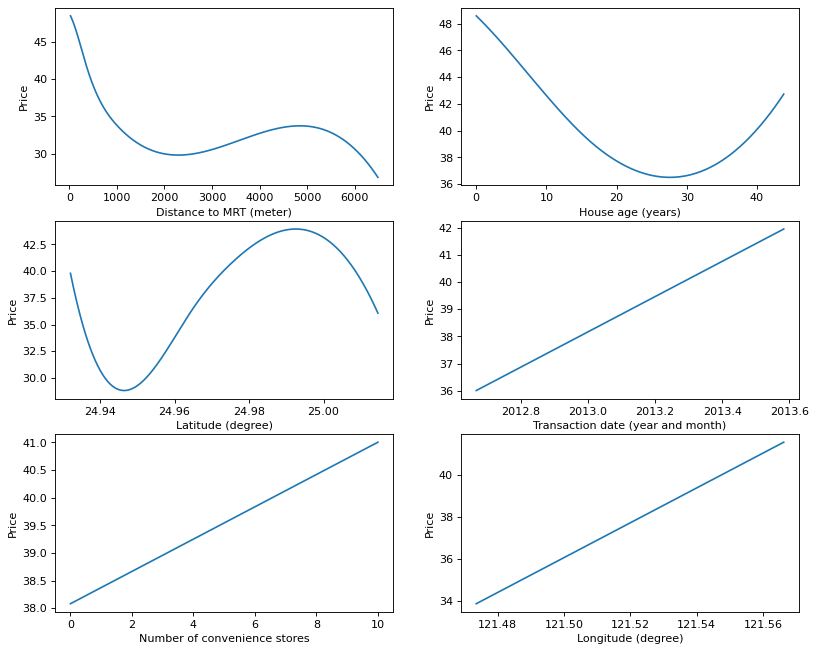

In [50]:
fmla = 'price~bs(dist_to_MRT,5)+ bs(house_age,4) + bs(latitude,5)+ transaction_date + num_of_conv_stores + longitude'

fsw_model = sm.GLM.from_formula(
    fmla, data=df)
fsw_results = fsw_model.fit()

vrbls = ['dist_to_MRT', 'house_age', 'latitude', 'transaction_date', 'num_of_conv_stores', 'longitude']

def get_median_mode(vrbls, num): 
    d_mat = {}
    for var in vrbls:
        if np.issubdtype(df[var].dtype, np.number):
            d_mat[var] = [df[var].median()]
        else:
            d_mat[var] = [df[var].mode()] 
    d_mat = pd.DataFrame(d_mat)
    return(sm.add_constant(pd.concat([d_mat]*num)))

titles = ['Distance to MRT (meter)', 'House age (years)','Latitude (degree)', 'Transaction date (year and month)' , 
          'Number of convenience stores', 'Longitude (degree)'] 
def plot_spline(var, plt, fsw_results, dat):
    if np.issubdtype(df[var].dtype, np.number):
        num = 500
        d_mat = get_median_mode(df, num)
        d_mat[var] = np.linspace(df[var].min(), df[var].max(), num) 
        #print(d_mat)
        y = fsw_results.predict(exog = d_mat)
        plt.plot(d_mat[var], y)
    else:
        d_mat = get_median_mode(df, df[var].nunique()) 
        d_mat[var] = df[var].unique()
        y = fsw_results.predict(exog = d_mat) 
        plt.bar(d_mat[var], y)
   # plt.set(xlabel=var, ylabel='Price')

fig=plt.figure(figsize=(12, 10), dpi=80)
#fig.tight_layout()

for itr, var in enumerate(vrbls):
    ax=fig.add_subplot(3, 2, itr+1) 
    plot_spline(var, ax, fsw_results, df)
    plt.xlabel(titles[itr])
    plt.ylabel('Price')

Summary of the model:

In [70]:
fsw_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                  414
Model:                            GLM   Df Residuals:                      396
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                          56.600
Method:                          IRLS   Log-Likelihood:                -1413.7
Date:                Mon, 24 Oct 2022   Deviance:                       22414.
Time:                        22:18:09   Pearson chi2:                 2.24e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9005
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.305e+04   6245.406     -3.690      0.000   -3.53e+04   -1.08e+04
bs(dist_to_MRT, 5)[0]    -1.4886      3.748     -0.397      0.691      -8.834       5.856
bs(dist_to_MRT, 5)[1]   -10.1818      2.743     -3.712      0.000     -15.558      -4.805
bs(dist_to_MRT, 5)[2]   -30.0186      5.287     -5.678      0.000     -40.380     -19.657
bs(dist_to_MRT, 5)[3]    -3.9256      7.131     -0.550      0.582     -17.902      10.051
bs(dist_to_MRT, 5)[4]   -21.5827      6.418     -3.363      0.001     -34.162      -9.004
bs(house_age, 4)[0]      -2.7403      3.124     -0.877      0.380      -8.864       3.383
bs(house_age, 4)[1]     -13.8664      3.011     -4.605      0.000     -19.768      -7.965
bs(house_age, 4)[2]     -13.1699      3.688     -3.571      0.000     -20.399      -5.941
bs(house_age, 4)[3]      -5.8461      3.350     -1.745      0.081     -12.411       0.719
bs(latitude, 5)[0]      -18.8890      7.271     -2.598      0.009     -33.140      -4.638
bs(latitude, 5)[1]       -5.7583      5.050     -1.140      0.254     -15.656       4.139
bs(latitude, 5)[2]        4.9300      6.159      0.800      0.423      -7.141      17.001
bs(latitude, 5)[3]        6.5282      7.839      0.833      0.405      -8.836      21.893
bs(latitude, 5)[4]       -3.7218      8.613     -0.432      0.666     -20.602      13.158
transaction_date          6.4819      1.341      4.835      0.000       3.854       9.110
num_of_conv_stores        0.2923      0.187      1.566      0.117      -0.073       0.658
longitude                82.7258     45.982      1.799      0.072      -7.398     172.850
=========================================================================================
"""